## Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Model Building:** The 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.




### Model Identification

The model will be trained on pre-defined dataset, i.e, it will have a supervised learning.
The target variable 'cnt' (count of total rental bikes including both casual and registered) is a continuous variable. 

Hence, we have chosen a Linear Regression Model for the analysis.

## Data Understanding

Objectives:
- Import the data set and all of the required libraries
- Inspect size and dimension of dataset
- Check number of missing values
- Check statistical aspects of data

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.api import ProbPlot, qqplot
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [3]:
# Import the dataset for bike sharing records
df_bike = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\ML1\Regression\day.csv")

In [4]:
# Check data rows
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the dimension of the dataset
df_bike.shape

(730, 16)

The given dataset has 16 columns with 730 data rows.

In [6]:
# Check number of null values in the dataset
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All of the columns have 730 non null values which matches with the max number of data rows for the given dataset. Therefore we can conclude that none of the columns are having null value.

In [7]:
# Check the stastical analysis of the given data
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The range of values in the dataset varies significantly, eg: max value for the column "yr" is 1 but for "hum" is 97.25. We have to rescale the data set before we can use it for our Linear Regression model.

## Data Cleansing

Objectives: 
- Make correction/adjustments in the dataset before we start our data analysis
- Convert feature values such as "season", "weathersit", into categorical string values 
- Drop unneccessary columns

In [8]:
# The column "instant" defines the index of the records, so we can reset the index of the dataset to same as "instant"
df_bike = df_bike.set_index("instant")

# Rename the column to index
df_bike = df_bike.rename_axis("Row")
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
Row,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Since our target variable is the total count "cnt" , we do not need the individual counts for casual and registered users. 
# Therefore we can drop the columns "casual" and "registered".

df_bike = df_bike.drop(["casual","registered"],axis=1)
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
Row,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Since we already have the date information in columns year, month, we only need "dteday" for the day of the month.
# Extracting day of the month from "dteday"
dt = pd.to_datetime(df_bike['dteday'],format='%d-%m-%Y')
df_bike["day"] = pd.DatetimeIndex(dt).day

# Now we can drop this column without loosing any information.
df_bike = df_bike.drop(["dteday"],axis=1)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
Row,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [11]:
df_bike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
Row,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5
6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606,6
7,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510,7
8,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959,8
9,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822,9


### Mapping categorical values to strings

Here we have considered the following columns as categorical data - 
[season , weathersit, month, weekday]

"holiday" and "workingday" are not considered because they have two values only (representing yes/no , true/false etc.)

In [12]:
categorical_columns = ["season" , "weathersit", "mnth", "weekday"]

In [13]:
# Map column "season" to categorical values.
df_bike["season"] = df_bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df_bike['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [14]:
# Map column "weathersit" to categorical values.
df_bike["weathersit"] = df_bike["weathersit"].map({1:"Clear & Partly cloudy", 2:"Mist & Cloudy", 
                                                   3:"Light Snow & Rain", 
                                                   4:"Heavy Snow & Rain"})
df_bike['weathersit'].dtype

dtype('O')

In [15]:
# Map column "mnth" to categorical values.
df_bike["mnth"] = df_bike["mnth"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
df_bike['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [16]:
# Map column "weekday" to categorical values.
df_bike["weekday"] = df_bike["weekday"].map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike['weekday'].value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

## Exploratory Data Analysis

- Perform Univariate/Bivariate/Multivariate Analysis on dataset
- Identify parameters/features with multicollinearity
- Check if any correlations exists among predictor variables and the target variable
- Perform Univariate and Multivariate analysis for the variables

### Univariate Analysis

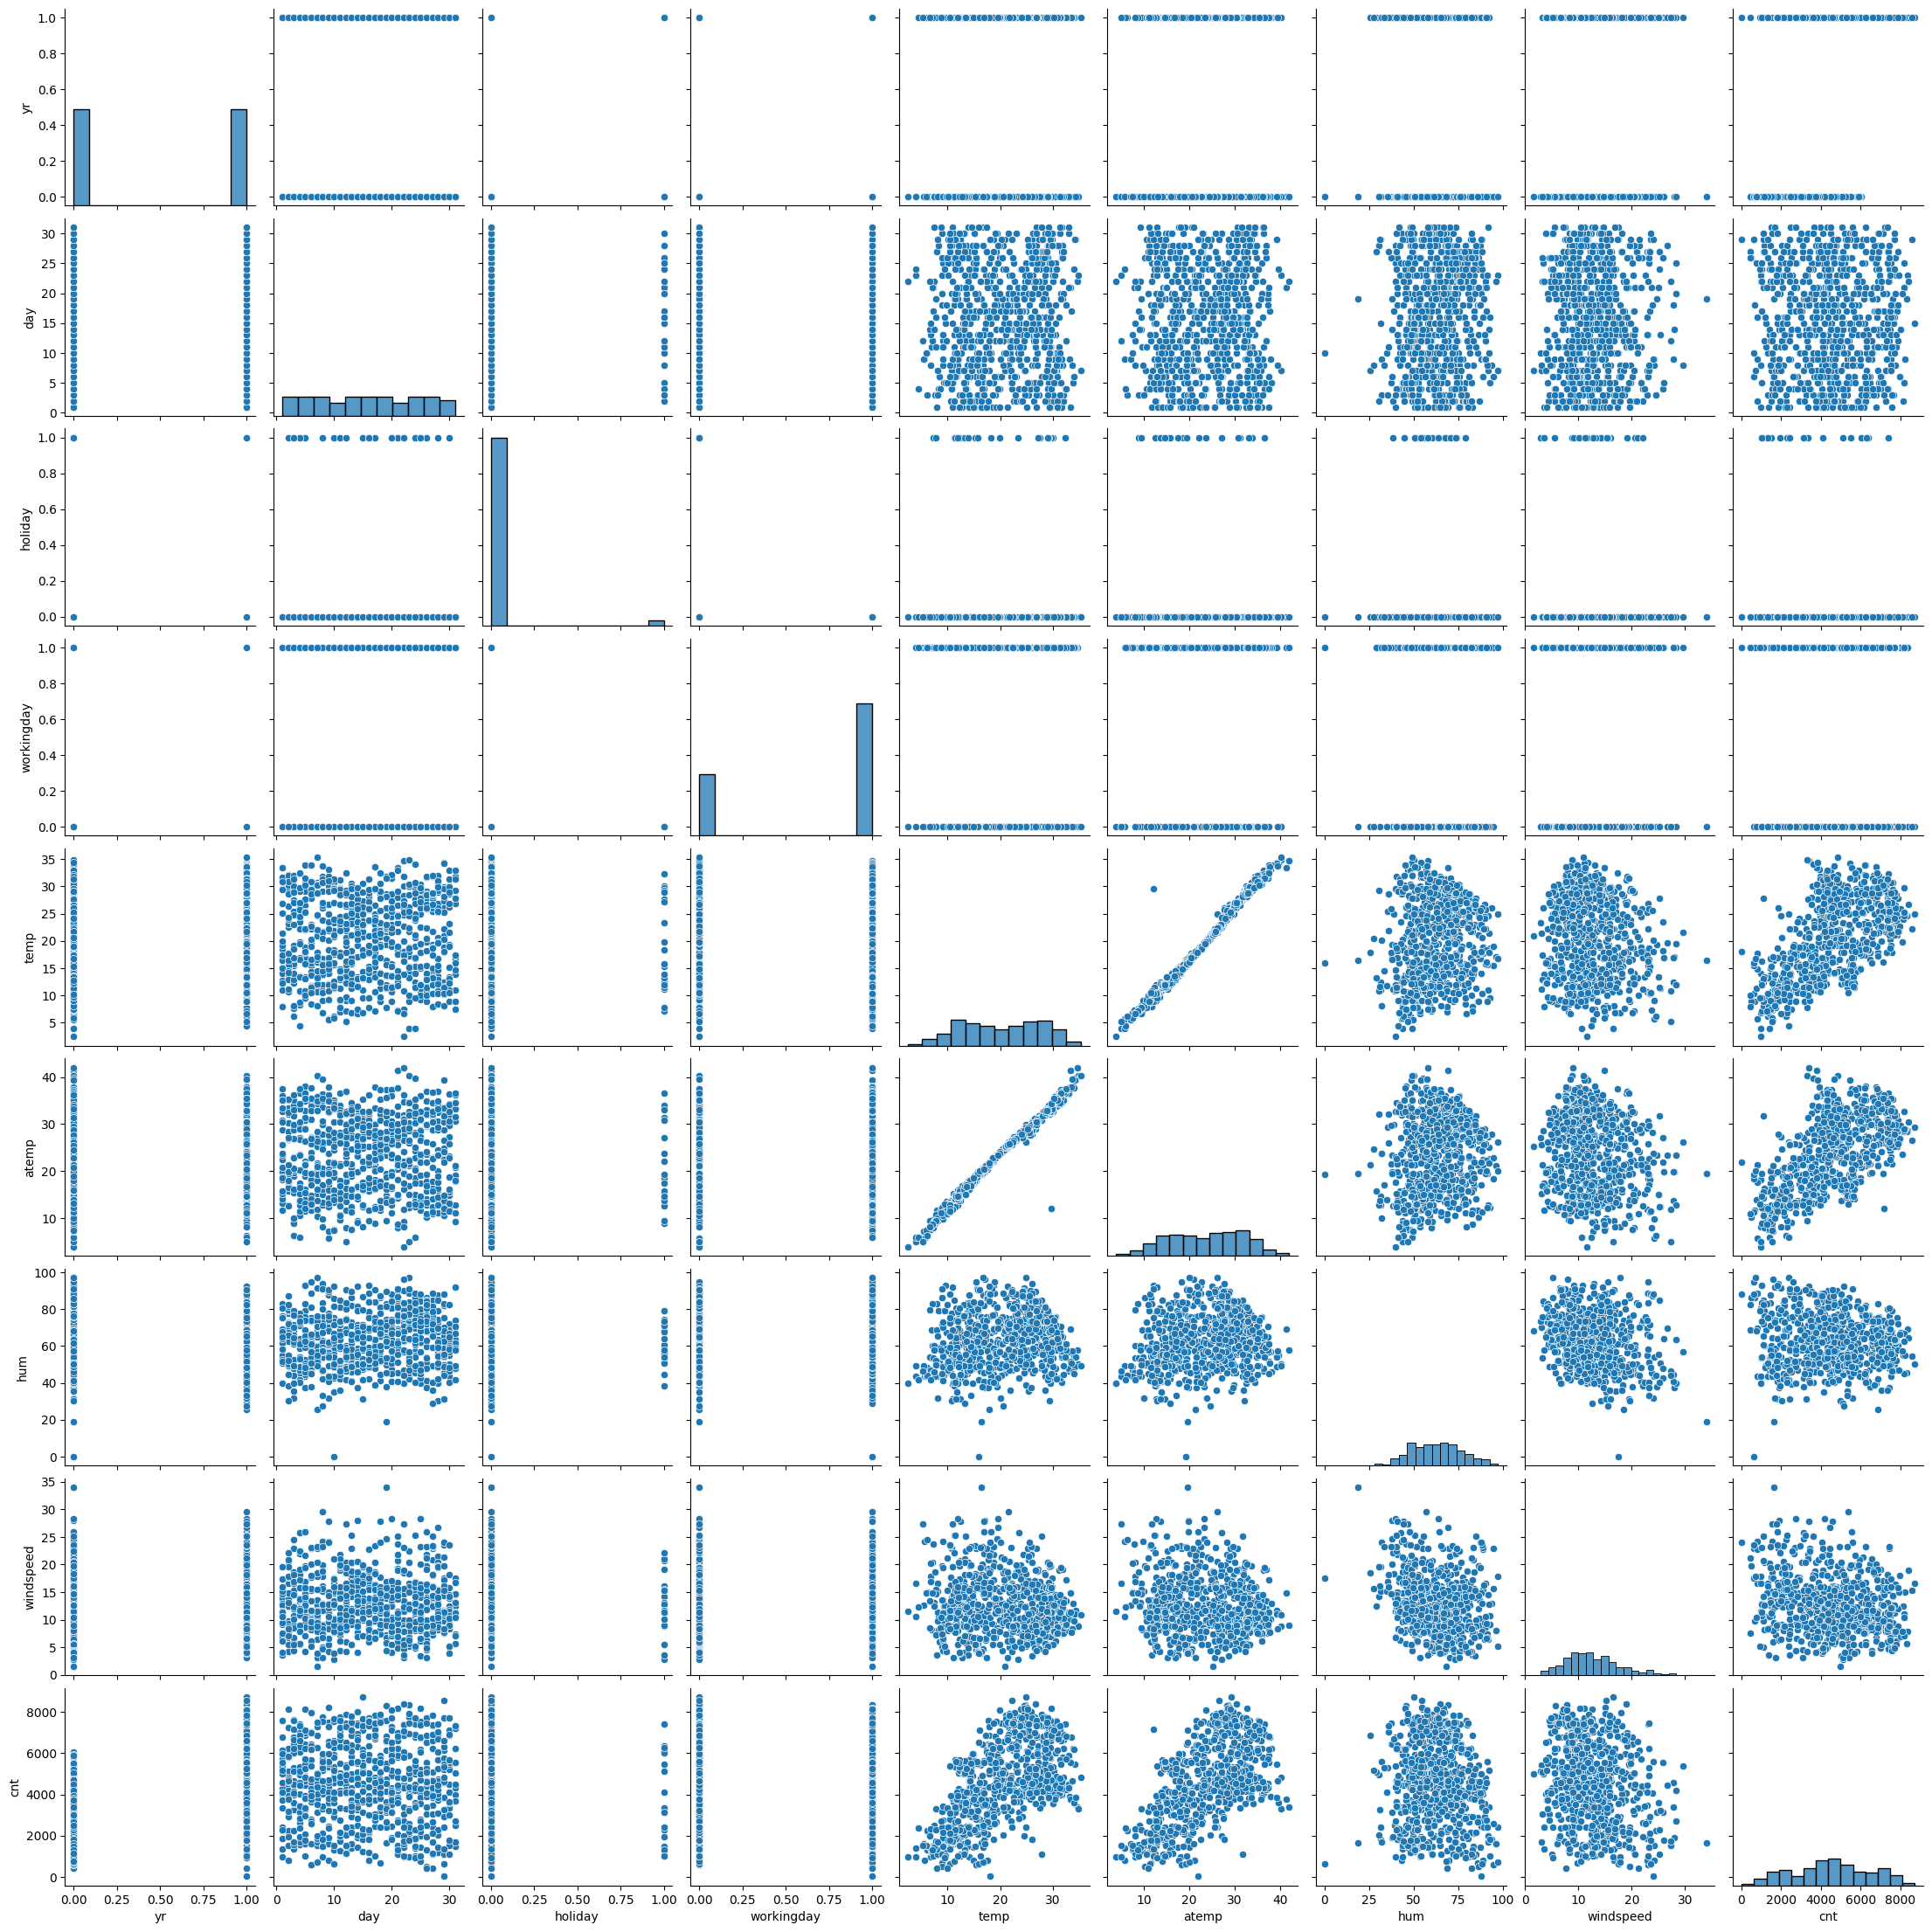

In [17]:
# Visualising the numeric variables
num_variables = ["yr","day", "holiday", "workingday", "temp", "atemp" , "hum", "windspeed", "cnt"]
sns.pairplot(df_bike[num_variables])
plt.show()

Observations:
- The count of rental bikes increased from 2018(represented by 0 in the dataset) to 2019(represented by 1 in the dataset). We can see a linearly increasing trend.
- Count looks uniformly spread across all days of the month. We can check if it still shows the same pattern when other features are involved.
- Count decreases considerably on holidays representing a linear relationship.
- Count of rental bikes for workingday is not much clear from the chart. We need to plot this again for a clear analysis.
- temp , atemp clearly shows similar linear relationship with count of rental bikes. The correlation between these parameters should be investigated.
- Humidity and windspeed shows dense clusters for a specific data range, we must check if they are fit for linear regression with the output variable.

<Axes: xlabel='workingday', ylabel='cnt'>

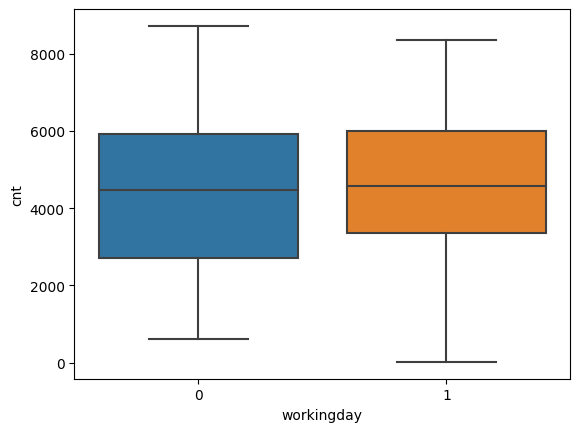

In [18]:
# Let us check workingday vs count of rental bikes
sns.boxplot(df_bike,x="workingday",y="cnt")

Observation: Average Count of rental bikes does not show significant change for workingday. 'Workingday' does not give enough information to be considered as an important feature in our LR as it does not show linear relationship.

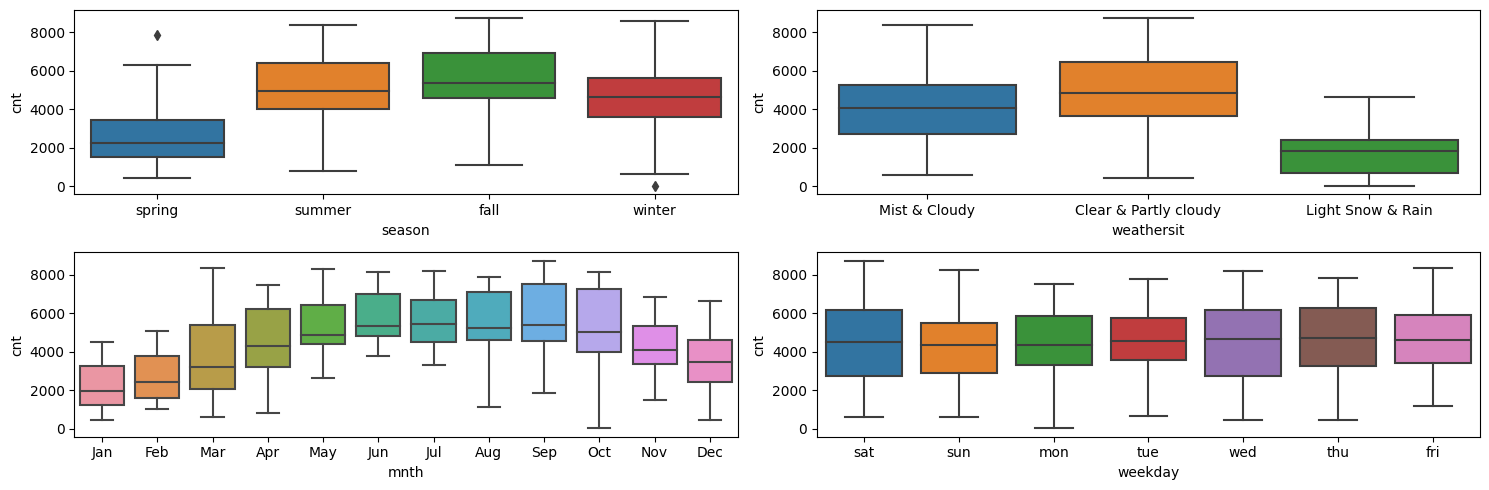

In [19]:
# Create plots for the categorical variables
plt.figure(figsize = (15, 5))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(2, 2, fignum)
    sns.boxplot(data = df_bike, x = featurename, y="cnt")

plt.tight_layout();

Observations:
- Count of rental bike is highest at the fall and lowest at the spring. The decrease in the rental count might have other factors involved such as holiday season, bad weather etc. which should be analysed in the bivariate/multivariate analysis.
- The count is max when weather is clear or partly cloudy and it decreases when there is mist, snow, rain, thunderstorm, scattered clouds i.e when the weather turns bad.
- Count varies a lot throughout the year. Count is comparatively lower during the beginning of every year gradually increasing reaching its peak at September. Holidays/weather condition might play a part.
- Count is more on Saturdays and lower on Mondays but the mean/average remains comparatively uniform throughout the week. We do not see any significant rise or drop in the rental count against weekdays.
- These factors clearly show a predictive pattern and should be evaluated in our Linear Regression Model.

### Bivariate/Multivariate Analysis

Objectives:
- Investigate parameters which shows similar trend or probable dependencies in the above charts.


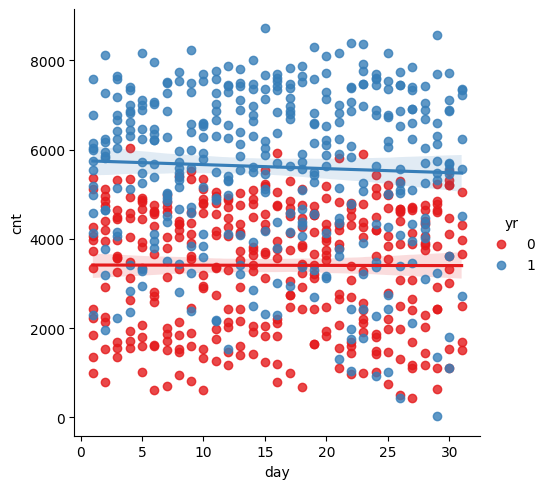

In [20]:
# Day of the month does not show much information for the count of rental bikes. We can check if the randomness prevails for both the years. 

ax = sns.lmplot(x = 'day', y = 'cnt', data=df_bike, hue='yr', palette='Set1')

The count of rental bikes has increased from 2018 to 2019 but there is no linearity between the days and the count. Therefore it is best to eliminate out this feature from our analysis.

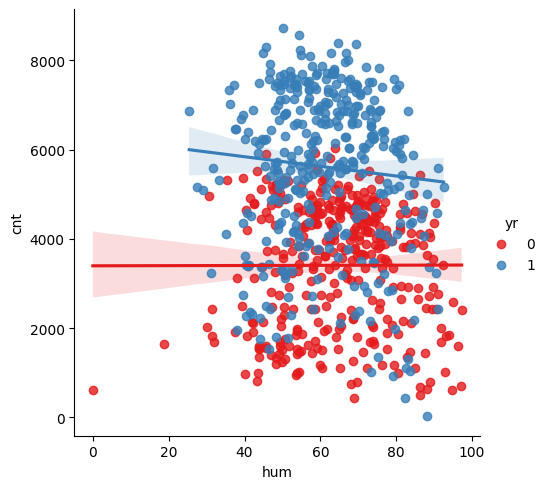

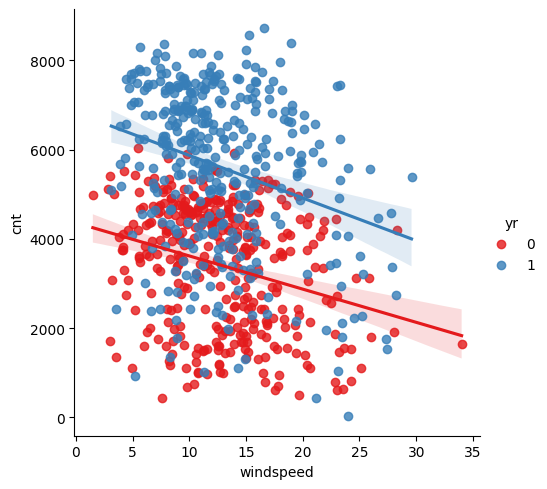

In [21]:
# Similarly let's check the data for humidity and windspeed

ax = sns.lmplot(x = 'hum', y = 'cnt', data=df_bike, hue='yr', palette='Set1')
ax = sns.lmplot(x = 'windspeed', y = 'cnt', data=df_bike, hue='yr', palette='Set1')

Both the plots show some linear pattern, hence we will consider both in our feature list.

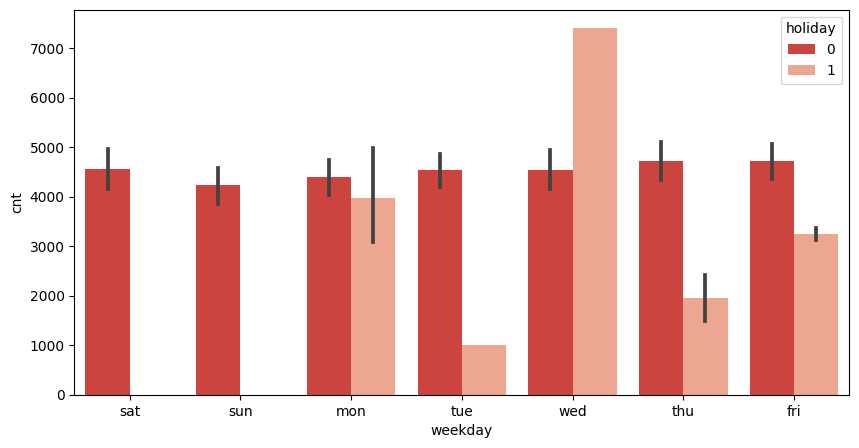

In [22]:
f, ax = plt.subplots(1,1, figsize=(10,5))
ax = sns.barplot(x = 'weekday', y = 'cnt',
                 hue='holiday', data=df_bike, palette='Reds_r')

We can observe that more people rent bikes when it is a holiday on a wednesday. We must evaluate holiday in our LR analysis.
However workingday (holiday = 0 and it is not a weekend) is constant for all of the days. This confirms our earlier analysis between count and workingdays.

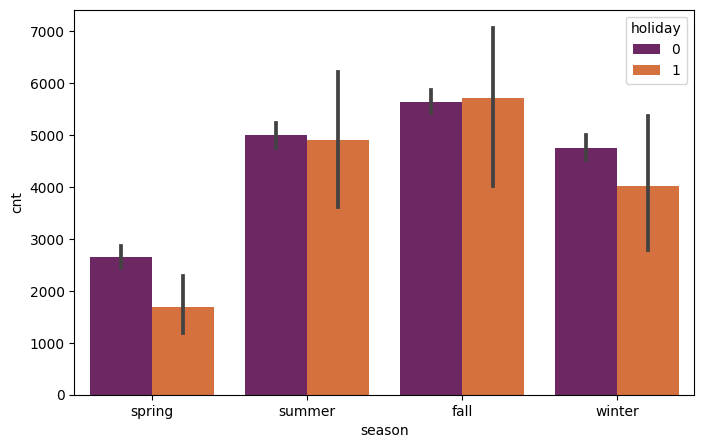

In [23]:
# Count of rental bike changes with season, let us check if holiday play a factor together with season.

f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x = 'season', y = 'cnt', data=df_bike,
                 orient='v', hue='holiday', palette='inferno')

Holiday does not seem to influence the season-wise count, we can infer that season and holiday has their own independent effect on the count of rental bikes.

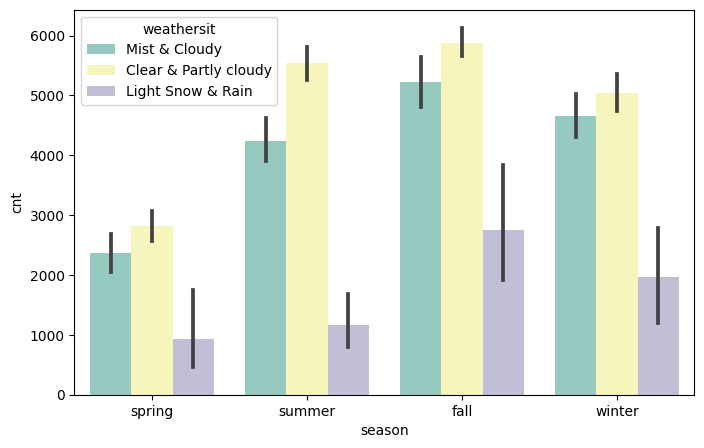

In [24]:
# Count of rental bike changes with season, let us check if weather condition play a factor together with season.

f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.barplot(x = 'season', y = 'cnt', data=df_bike,
                 orient='v', hue='weathersit', palette='Set3')

Count has the same distribution for seasons when we consider weather situation as well. We can safely consider both the features into consideration.

## Data Preparation

- Drop column 'day' as it shows no linear relationship with count.
- Drop column 'workingday' as it is not very significant for the count.
- Replace variables with more than 2 categories with dummy variables so that they fit into the LR model.
- We have considered the features - "season" , "weathersit"

In [25]:
# Drop column day
df_bike.drop("day",axis=1,inplace=True)

# Drop column workingday
df_bike.drop("workingday",axis=1,inplace=True)

In [26]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_cat'
season_cat = pd.get_dummies(df_bike['season'])

# We can drop fall and can still identify all the categories uniquely
# fall: False/False/False , spring: True/False/False , summer: False/True/False, winter: False/False/True
season_cat = pd.get_dummies(df_bike['season'],drop_first=True)
season_cat.value_counts()

# Adding the season categories to the dataframe and dropping the original column "season"
df_bike = pd.concat([df_bike, season_cat], axis = 1)
df_bike.drop(['season'], axis = 1, inplace = True)

In [27]:
df_bike.head()

,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
Row,,,,,,,,,,,,,
1,0,Jan,0,sat,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985,True,False,False
2,0,Jan,0,sun,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801,True,False,False
3,0,Jan,0,mon,Clear & Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
4,0,Jan,0,tue,Clear & Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
5,0,Jan,0,wed,Clear & Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [28]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather_cat'
weather_cat = pd.get_dummies(df_bike['weathersit'])

# We can drop "Clear & Partly Cloudy" and can still identify all the categories uniquely
# We do not see any record for the category "Heavy Snow & Rain" in the given dataset, hence we can consider its value as False
# Our mapping "Clear & Partly cloudy" : F/F/F/F, "Mist & Cloudy": F/T/F/F, "Light Snow & Rain":F/F/T/F,"Heavy Snow & Rain":F/F/F/T becomes
# "Clear & Partly cloudy" : F/F, "Mist & Cloudy": F/T, "Light Snow & Rain":T/F
weather_cat = pd.get_dummies(df_bike['weathersit'],drop_first=True)
weather_cat.value_counts()

# Adding the season categories to the dataframe and dropping the original column "weathersit"
df_bike = pd.concat([df_bike, weather_cat], axis = 1)
df_bike.drop(['weathersit'], axis = 1, inplace = True)

In [29]:
df_bike.head()

,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow & Rain,Mist & Cloudy
Row,,,,,,,,,,,,,,
1,0,Jan,0,sat,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
2,0,Jan,0,sun,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
3,0,Jan,0,mon,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
4,0,Jan,0,tue,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
5,0,Jan,0,wed,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [30]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_cat'
mnth_cat = pd.get_dummies(df_bike['mnth'])

# Similar to the columns mentioned above, we can drop one of the month category and can still identify all the categories uniquely
mnth_cat = pd.get_dummies(df_bike['mnth'],drop_first=True)
mnth_cat.value_counts()

# Adding the season categories to the dataframe and dropping the original column "weathersit"
df_bike = pd.concat([df_bike, mnth_cat], axis = 1)
df_bike.drop(['mnth'], axis = 1, inplace = True)

In [31]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'wkday_cat'
wkday_cat = pd.get_dummies(df_bike['weekday'])

# Similar to the columns mentioned above, we can drop one of the weekday category and can still identify all the categories uniquely
wkday_cat = pd.get_dummies(df_bike['weekday'],drop_first=True)
wkday_cat.value_counts()

# Adding the season categories to the dataframe and dropping the original column "weathersit"
df_bike = pd.concat([df_bike, wkday_cat], axis = 1)
df_bike.drop(['weekday'], axis = 1, inplace = True)

In [32]:
df_bike.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
Row,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,0,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,False,False,True,False
5,0,0,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,True


## Splitting into Training and Testing Sets

Objectives:
- Divide the dataset into train and test data with a ratio 70:30

In [33]:

# train and test data set should always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling and Correlation

Objectives:
- Rescale the numeric data
- Identify correlated features

In [34]:
# As seen before, the range of data across the columns of the dataset are not uniform and needs to be rescaled.
# We are using min-max scaling for our dataset.

scaler = MinMaxScaler()
num_variables.remove('day')
num_variables.remove('workingday')
# Apply scaler() to all the columns except the 'dummy' variables
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
Row,,,,,,,,,,,,,,,,,,,,,
654,1.0,0.0,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,True,...,False,False,True,False,False,False,False,False,True,False
577,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,False,False,True,False
427,1.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,False,False,True,False,False,False,False
729,1.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,False,False,True,False,False,False
483,1.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [35]:
# Check the minimum and maximum values of the numeric columns
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


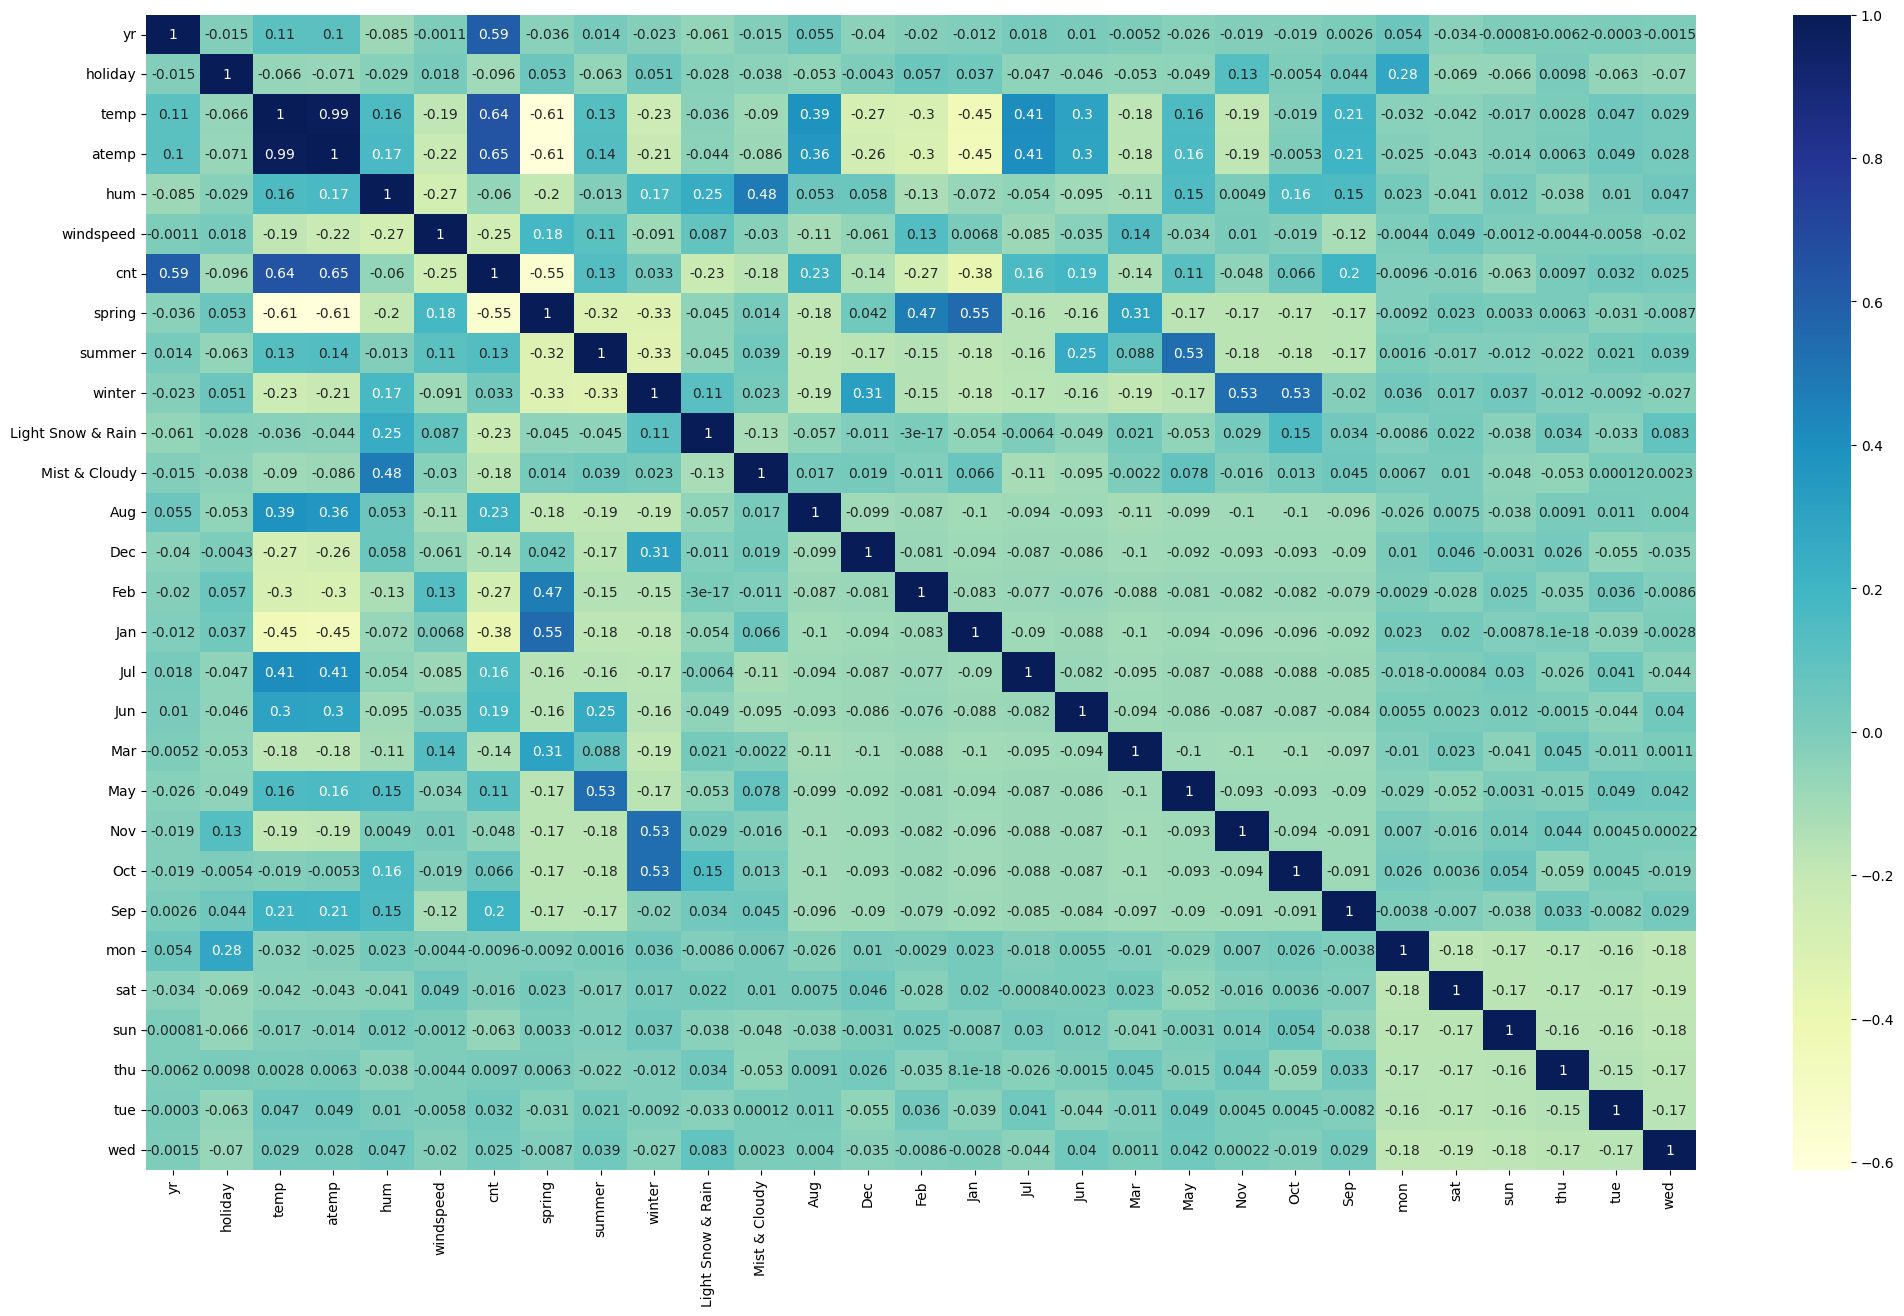

In [36]:
# Check correlation coefficients of numeric variables

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations:
- year, temperature and feeling temperature have very high correlations with count and very high negative correlation with spring. 
- Temperature and feeling temperature have very high correlation with each other as well.
- Spring has very high negative correlation with count.

## Building a linear model

- Creating X and Y sets for the model
- Adding constant to the model (Best Practise)
- We start with all the available features and evaluate the model
- Based on the evaluation results we will drop the features as and when required
- We will use recursive elimination features as our initial count of features are too high (15)
- Once the number of features reduce we will evaluate the model manually to achieve the most efficient LR Model

In [37]:
# Creating X and Y sets for the LR Model training

y_train = df_train.pop('cnt')
X_train = df_train


In [38]:
# Create a Linear Regression Model

Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)


LinearRegression()

In [39]:
# Using recursive feauture elimination method to identify the significance of the predictors
# In the first model we will consider all the features
# We have 15 features in the given dataset excluding the "cnt"
rfe = RFE(estimator=Lin_reg, n_features_to_select=31) 
rfe = rfe.fit(X_train,y_train)
rfe_result = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_result

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', True, 1),
 ('tue', True, 1),
 ('wed', True, 1)]

In [40]:
len(rfe_result)

28

In [41]:
# List out columns with positive RFE result
rfe_positv = X_train.columns[rfe.support_]

# The ranking for all the columns is 1, so we do not need to set select by priority
print(rfe_positv)

# As our first model we will use these columns as predictor variables

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')


In [42]:
# Model building functions
# We will use these functions for all our models

# Function to create and train LR Model
def create_LM(features):
    X_train_lm = X_train[features].astype(float)
    # Adding a constant to the model (it's a best practice)
    X_train_sm = sm.add_constant(X_train_lm)  
    # Create and train a linear regression model for the data and view its summary
    lr = sm.OLS(y_train, X_train_sm).fit()
    # Return LR Model
    return lr

# Function to create a regression plot for the model
# Create a scatter plot between the fitted values of 'Count' and the residuals
def plot_residuals(lr_model):
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = lr_model.fittedvalues, y = lr_model.resid)
    plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
    plt.xlabel('Fitted Values of Count')
    plt.ylabel('Residuals')

    # Create a histogram of the residuals
    plt.subplot(1, 2, 2)
    sns.histplot(data = X_train, x = lr_model.resid, color = 'lightgray')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')

# Function to calculate errors for the model
def calculate_errors(lr_model):
    # Predicted values
    y_pred = lr_model.fittedvalues
    # Actual values
    y_true = y_train

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')

# Function to calculate VIF for Models

def calc_VIF(features):
    # VIF dataframe
    X = sm.add_constant(X_train[features].astype(float)) 
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),3)
                            for i in range(len(X.columns))]
    
    return vif_data

### Model 1

Predictor variables: ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

Target variable: ['cnt']

In [43]:
# Check LR statistics for Model 1
lr_model1 = create_LM(rfe_positv)
print("Summary: LR Model 1",'\n',lr_model1.summary())

Summary: LR Model 1 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          8.42e-181
Time:                        11:22:56   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


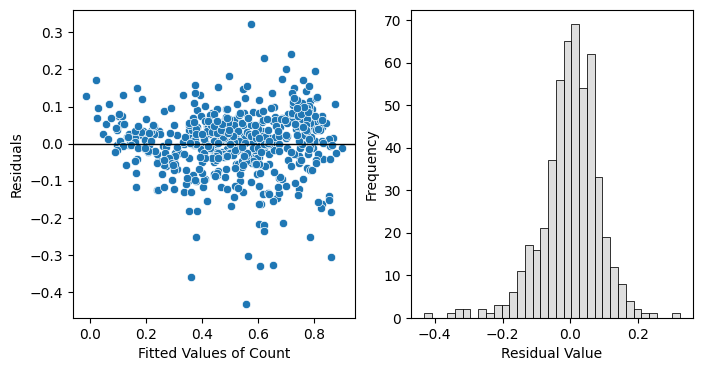

In [44]:
# Verify error distribution
plot_residuals(lr_model1)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model1)


<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Mar'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Mar" should not be considered as a predictor variable             

### Model 2

Predictor variables: ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

Dropped variables: ['Mar']

Target variable: ['cnt']

In [45]:
# Check LR statistics for Model 2
features = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']
lr_model2 = create_LM(features)
print("Summary: LR Model 2",'\n',lr_model2.summary())

Summary: LR Model 2 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          8.19e-182
Time:                        11:22:56   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


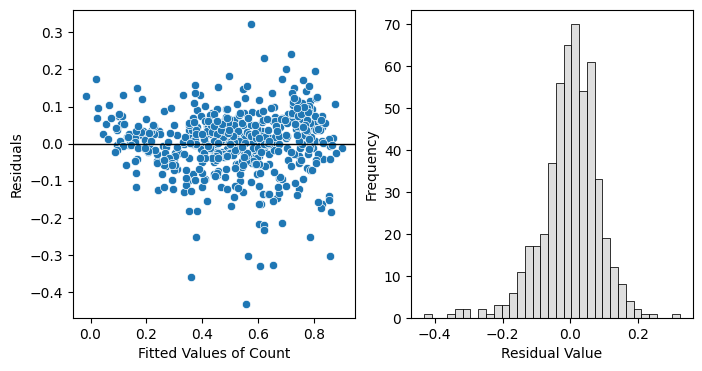

In [46]:
# Verify error distribution
plot_residuals(lr_model2)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model2)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Jun'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Jun" should not be considered as a predictor variable   

### Model 3

Predictor variables: ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

Dropped variables: ['Jun','Mar']

Target variable: ['cnt']

In [47]:
# Check LR statistics for Model 
features = ['yr', 'holiday','temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain', 'Mist & Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Oct',
       'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']
lr_model3 = create_LM(features)
print("Summary: LR Model 3",'\n',lr_model3.summary())

Summary: LR Model 3 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          7.82e-183
Time:                        11:22:57   Log-Likelihood:                 528.02
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


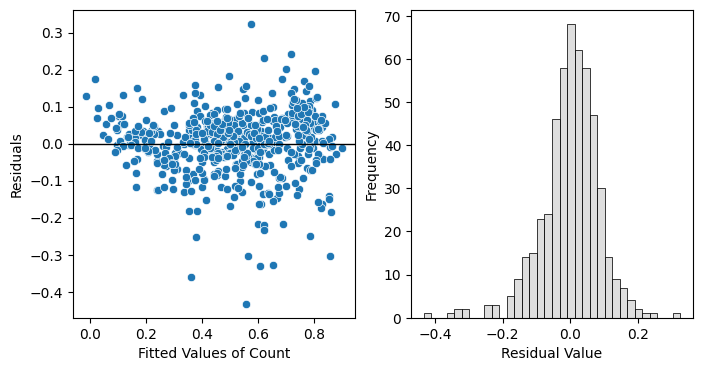

In [48]:
# Verify error distribution
plot_residuals(lr_model3)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model3)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Oct'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Oct" should not be considered as a predictor variable   

### Model 4

Predictor variables: ['yr', 'holiday','temp', 'atemp', 'hum', 'windspeed',
        'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

Dropped variables: ['Jun','Mar','Oct']

Target variable: ['cnt']

In [49]:
# Check LR statistics for Model 
features = ['yr', 'holiday','temp', 'atemp', 'hum', 'windspeed',
             'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

lr_model4 = create_LM(features)
print("Summary: LR Model 4",'\n',lr_model4.summary())

Summary: LR Model 4 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          7.52e-184
Time:                        11:22:57   Log-Likelihood:                 527.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

In [50]:
# Since atemp and wed has the same P-Value let us check the VIF to identify which feature should be dropped.

calc_VIF(features=features)

,feature,VIF
0,const,106.611
1,yr,1.046
2,holiday,1.136
3,temp,60.903
4,atemp,54.953
5,hum,1.991
6,windspeed,1.271
7,spring,8.597
8,summer,6.631
9,winter,6.359


Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


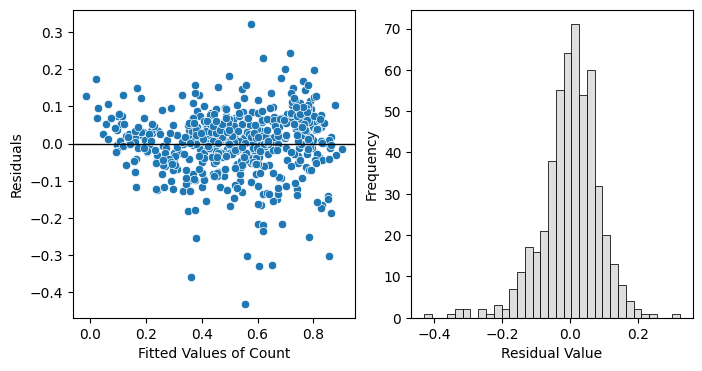

In [51]:
# Verify error distribution
plot_residuals(lr_model4)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model4)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'atemp' and its VIF is high as well.  . Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "atemp" should not be considered as a predictor variable   

### Model 5

Predictor variables: ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'day', 'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sat', 'sun', 'thu', 'tue','wed']

Dropped variables: ['Jun','Mar','Oct','atemp']

Target variable: ['cnt']

In [52]:
# Check LR statistics for Model 
features = ['yr','temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sat', 'sun', 'thu', 'tue','wed']
lr_model5 = create_LM(features)
print("Summary: LR Model 5",'\n',lr_model5.summary())

Summary: LR Model 5 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.26e-183
Time:                        11:22:57   Log-Likelihood:                 522.36
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     486   BIC:                            -895.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


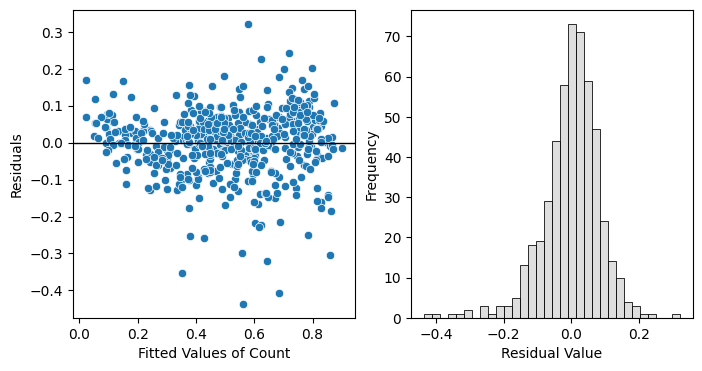

In [53]:
# Verify error distribution
plot_residuals(lr_model5)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model5)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'sat'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "sat" should not be considered as a predictor variable   

### Model 6

Predictor variables: ['yr', 'holiday','temp', 'hum', 'windspeed',
       'day', 'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'wed', 'sun', 'thu', 'tue']

Dropped variables: ['Jun','Mar','Oct','atemp','sat']

Target variable: ['cnt']

In [54]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'wed', 'sun', 'thu', 'tue']
lr_model6 = create_LM(features)
print("Summary: LR Model 6",'\n',lr_model6.summary())

Summary: LR Model 6 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.11e-184
Time:                        11:22:58   Log-Likelihood:                 522.35
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     487   BIC:                            -901.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


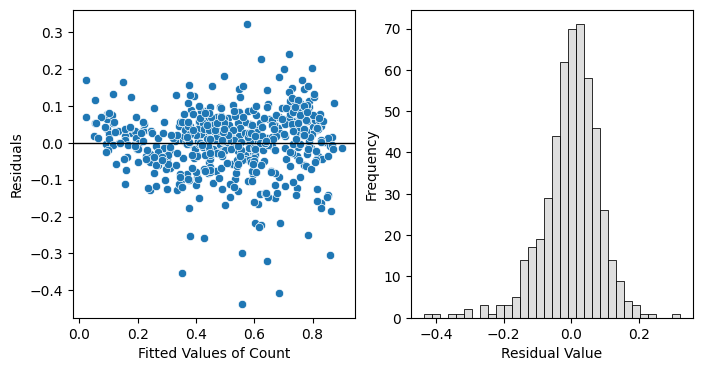

In [55]:
# Verify error distribution
plot_residuals(lr_model6)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model6)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'wed'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "wed" should not be considered as a predictor variable   

### Model 7

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun', 'thu', 'tue']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat']

Target variable: ['cnt']

In [56]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun', 'thu', 'tue']
lr_model7 = create_LM(features)
print("Summary: LR Model 7",'\n',lr_model7.summary())

Summary: LR Model 7 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.01e-185
Time:                        11:22:58   Log-Likelihood:                 522.29
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


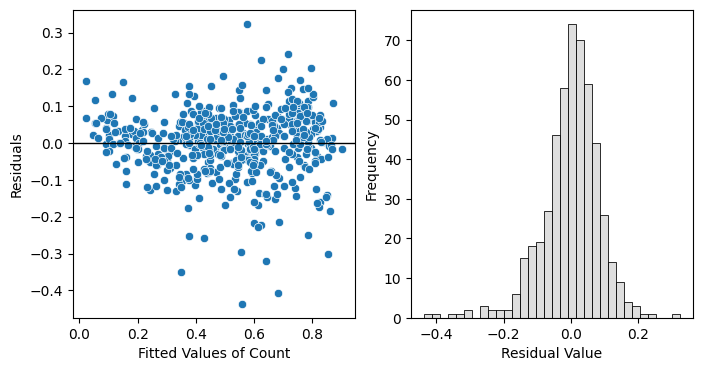

In [57]:
# Verify error distribution
plot_residuals(lr_model7)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model7)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Aug'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Aug" should not be considered as a predictor variable   

### Model 8

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun', 'thu', 'tue']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug']

Target variable: ['cnt']

In [58]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun', 'thu', 'tue']
lr_model8 = create_LM(features)
print("Summary: LR Model",'\n',lr_model8.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.07e-186
Time:                        11:22:59   Log-Likelihood:                 522.04
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


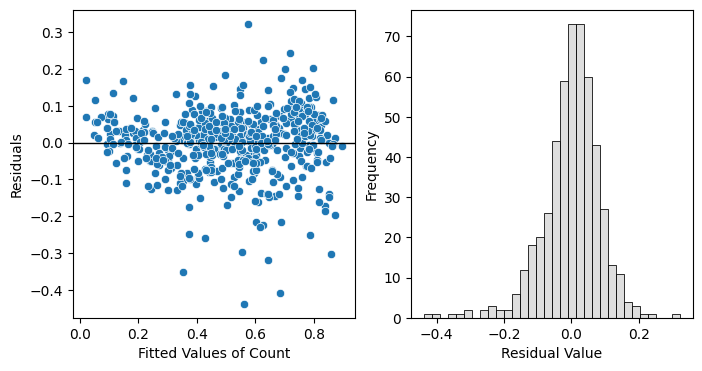

In [59]:
# Verify error distribution
plot_residuals(lr_model8)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model8)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Thu'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Thu" should not be considered as a predictor variable   

### Model 9

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun','tue']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug','Thu']

Target variable: ['cnt']


In [60]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun','tue']
lr_model9 = create_LM(features)
print("Summary: LR Model",'\n',lr_model9.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.14e-187
Time:                        11:22:59   Log-Likelihood:                 521.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -918.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


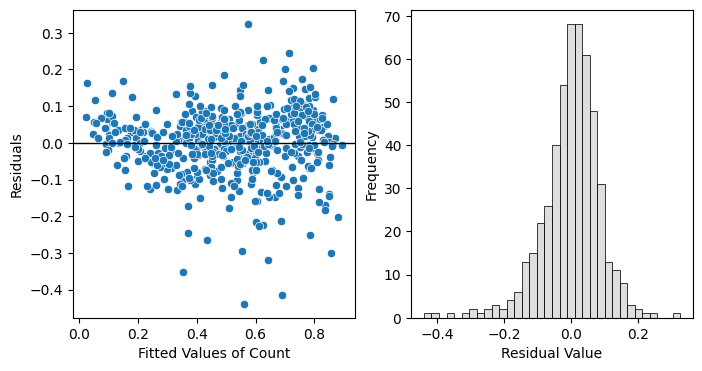

In [61]:
# Verify error distribution
plot_residuals(lr_model9)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model9)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Tue'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Tue" should not be considered as a predictor variable   

### Model 10

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug','Thu','Tue']

Target variable: ['cnt']

In [62]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul', 'May',
       'Nov', 'Sep', 'mon', 'sun']
lr_model10 = create_LM(features)
print("Summary: LR Model",'\n',lr_model10.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.78e-188
Time:                        11:23:00   Log-Likelihood:                 521.06
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


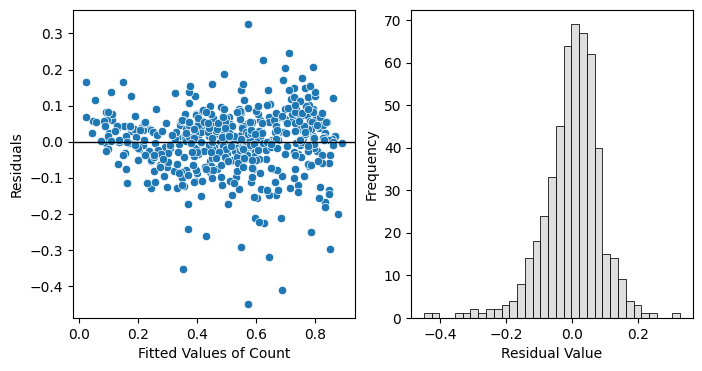

In [63]:
# Verify error distribution
plot_residuals(lr_model10)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model10)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'May'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "May" should not be considered as a predictor variable   

### Model 11


Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug','Thu','Tue','May']

Target variable: ['cnt']

In [64]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec', 'Feb', 'Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']
lr_model11 = create_LM(features)
print("Summary: LR Model",'\n',lr_model11.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.70e-189
Time:                        11:23:00   Log-Likelihood:                 520.03
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     492   BIC:                            -927.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


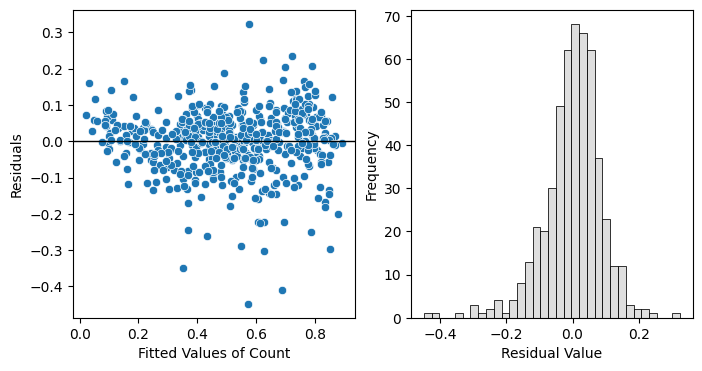

In [65]:
# Verify error distribution
plot_residuals(lr_model11)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model11)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-value is extremely high for 'Feb'. Residual values are random(without any predictive pattern) and normally distributed with mean 0.   
**Change recommendation for next Model**: To improve the model, "Feb" should not be considered as a predictor variable   

### Model 12

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec','Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug','Thu','Tue','May','Feb']

Target variable: ['cnt']

In [66]:
# Check LR statistics for Model 
features = ['yr', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec','Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']
lr_model12 = create_LM(features)
print("Summary: LR Model",'\n',lr_model12.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.39e-189
Time:                        11:23:00   Log-Likelihood:                 518.35
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     493   BIC:                            -930.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Error Calculation:
RMSE: 0.09
MAE: 0.06
MSE: 0.01


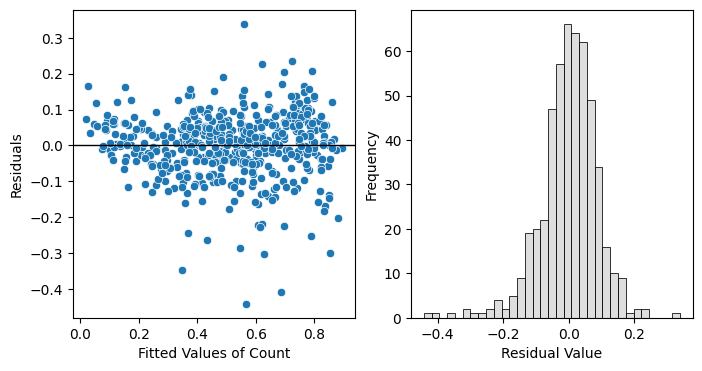

In [67]:
# Verify error distribution
plot_residuals(lr_model12)

# Calculate MSE,MAE and RSME
print("Error Calculation:")
calculate_errors(lr_model12)

<font size=3><p style="color:purple">
**Observations from Model Summary**: P-values for the predictor variables are within the acceptable range. However we need to also check the VIF values to identify correlated variables    


In [68]:
# Check VIF for Model 12
print(calc_VIF(features))

              feature     VIF
0               const  82.689
1                  yr   1.040
2                temp   4.437
3                 hum   1.942
4           windspeed   1.214
5              spring   5.264
6              summer   2.763
7              winter   3.829
8   Light Snow & Rain   1.270
9       Mist & Cloudy   1.579
10                Dec   1.497
11                Jan   1.678
12                Jul   1.491
13                Nov   1.732
14                Sep   1.332
15                mon   1.042
16                sun   1.049



<font size=3><p style="color:purple">
**Observations from Model Summary**: VIF is too high for 'Spring'. From the correlation heatmap we can also see it has strong correlation with temp and count.     
**Change recommendation for next Model** : "Spring" should not be considered as a predictor variable  

### Model 13

Predictor variables: ['yr', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec','Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']

Dropped variables: ['Jun','Mar','Oct','atemp','wed','sat','Aug','Thu','Tue','May','Feb','spring']

Target variable: ['cnt']

In [69]:
features = ['yr', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Light Snow & Rain',
       'Mist & Cloudy','Dec','Jan', 'Jul',
       'Nov', 'Sep', 'mon', 'sun']

lr_model13 = create_LM(features)
print("Summary: LR Model",'\n',lr_model13.summary())

Summary: LR Model 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.35e-188
Time:                        11:23:01   Log-Likelihood:                 513.27
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     494   BIC:                            -926.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [70]:
# Re-check VIF
print(calc_VIF(features))

              feature     VIF
0               const  51.831
1                  yr   1.036
2                temp   2.333
3                 hum   1.918
4           windspeed   1.198
5              summer   1.438
6              winter   2.081
7   Light Snow & Rain   1.261
8       Mist & Cloudy   1.564
9                 Dec   1.476
10                Jan   1.669
11                Jul   1.437
12                Nov   1.677
13                Sep   1.210
14                mon   1.041
15                sun   1.049



<font size=3><p style="color:purple">
**Observations from Model Summary**: The p-values and VIF for the predictor variables are in acceptable range.We can use Model 13 for our predictions. 

## Model Evaluation

Obejective:
- Check if error terms are normally distributed
- Scaling test data
- Prediction on test set
- Check Root Mean SQ. Errors
- Evaluate the fit on test data set

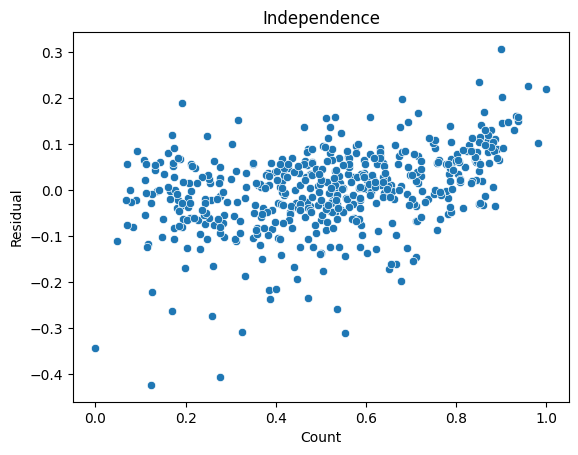

In [78]:
# Check error terms for train data
X_train_lm = X_train[features].astype(float)
# Adding a constant to the model 14
X_train_sm = sm.add_constant(X_train_lm)  

y_train_pred = lr_model13.predict(X_train_sm)
res = (y_train - y_train_pred)

sns.scatterplot(x=y_train,y=res)
plt.title("Independence")
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<font size=3><p style="color:purple">
**Observations**: Residual error does not reflect any specific pattern. The error terms are independent of each other

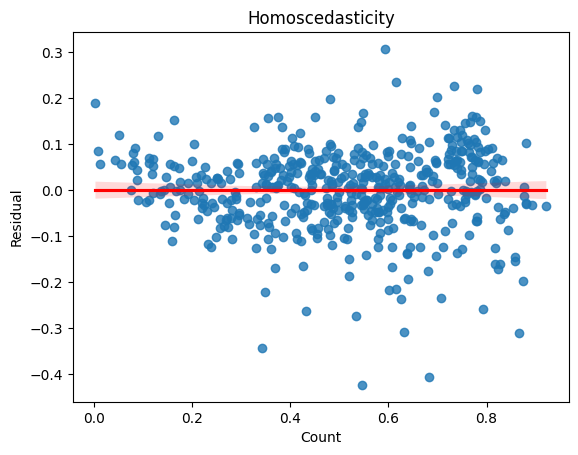

In [101]:
# Check for Homoscedasticity - residual vs predicted data should not have distinctive pattern
#sns.scatterplot(x=y_train_pred,y=res)
sns.regplot(x=y_train_pred, y=res,line_kws = {"color": "red"})
plt.title("Homoscedasticity")
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


<font size=3><p style="color:purple">
**Observations**: Scatterplot does not show any distinctive pattern, the scatterpoints are evenly distributed in both sides of the line. We can confirm Homoscedasticity is maintained.

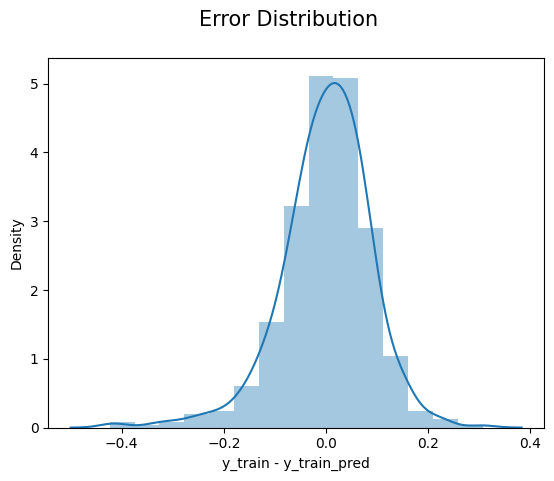

In [84]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Distribution', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 10)         # X-label
plt.show()


<font size=3><p style="color:purple">
**Observations**: The residuals are following the normally distributed with a mean 0.

### Prediction on test data

In [73]:
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [74]:
# Creating X and Y sets for the LR Model test

y_test = df_test.pop('cnt')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_new)

# Predict the y values corresponding to X_test_sm
y_pred = lr_model13.predict(X_test_sm)

### Error Calculation and model fit check

In [75]:
# Calculating MAE
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculating MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)
print("MAE:", round(mae,3))
print("MSE:", round(mse,3))
print("RMSE:", round(rmse,3))

MAE: 0.071
MSE: 0.009
RMSE: 0.095


In [76]:
# Check R-SQ on test set

r_squared = r2_score(y_test, y_pred)

print("R²:", round(r_squared,3))

R²: 0.811


<font size=3><p style="color:purple">
**Observations**: R-Squared value looks good enough for the prediction.

Text(0, 0.5, 'Predicted Data')

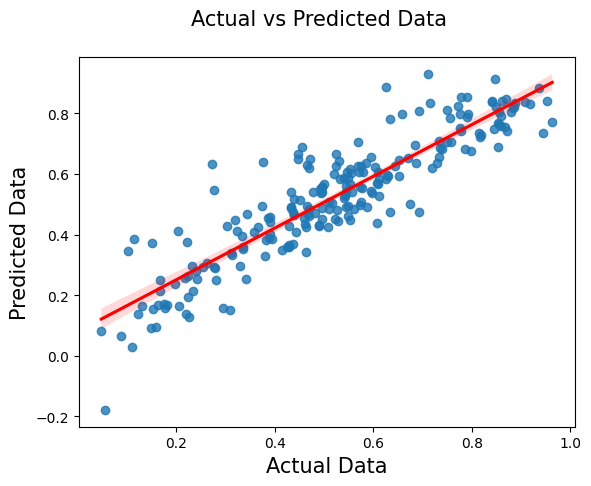

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test.astype(float), y=y_pred.astype(float),line_kws = {"color": "red"})
fig.suptitle('Actual vs Predicted Data', fontsize=15)              # Plot heading 
plt.xlabel('Actual Data', fontsize=15)                          # X-label
plt.ylabel('Predicted Data', fontsize=15)                          # Y-label

<font size=3><p style="color:purple">
**Observations**: The actual data and predicted data are closely spread, we can conclude that the error is minimum. We can say our model can predict the bike demands fairly well.

## Conclusion:

We can conclude that **Model 13** is the best fitting model for our Case.

**Features**
The variables which are significant in predicting the demand for shared bikes - 
- year 
- temperature
- humidity
- windspeed
- Season (summer,winter)
- Weather Situation (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
- Month (December, January , July, November, September)
- Weekday (Monday, Sunday)      

**Model Assumptions**
The residuals from the model confirms our assumptions for Model Error Analysis : 
- Linearity : The predictor variables and target variable have linear relationship
- Error terms are normally distributed with their mean residing at 0
- Error terms are independent of each other
- Error terms have constant variance

**Model Evaluation**         
Mean Absolute Error : 0.071       
Mean SQ Error: 0.009        
Root Mean SQ Error: 0.095      
R-SQ : 0.811

The Actual data and the predicted data show enough similarity to conclude that the model can predict bike demands fairly well.